# HW 04 - CLUSTERING

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
%matplotlib inline

In [6]:
federalist_papers = pd.read_csv('HW4-data-fedPapers85.csv')
federalist_papers.shape

(85, 72)

In [67]:
federalist_papers.head()

,author,filename,a,all,also,an,and,any,are,as,...,was,were,what,when,which,who,will,with,would,your
0,dispt,dispt_fed_49.txt,0.280,0.052,0.009,0.096,0.358,0.026,0.131,0.122,...,0.009,0.017,0.000,0.009,0.175,0.044,0.009,0.087,0.192,0.0
1,dispt,dispt_fed_50.txt,0.177,0.063,0.013,0.038,0.393,0.063,0.051,0.139,...,0.051,0.000,0.000,0.000,0.114,0.038,0.089,0.063,0.139,0.0
2,dispt,dispt_fed_51.txt,0.339,0.090,0.008,0.030,0.301,0.008,0.068,0.203,...,0.008,0.015,0.008,0.000,0.105,0.008,0.173,0.045,0.068,0.0
3,dispt,dispt_fed_52.txt,0.270,0.024,0.016,0.024,0.262,0.056,0.064,0.111,...,0.087,0.079,0.008,0.024,0.167,0.000,0.079,0.079,0.064,0.0
4,dispt,dispt_fed_53.txt,0.303,0.054,0.027,0.034,0.404,0.040,0.128,0.148,...,0.027,0.020,0.020,0.007,0.155,0.027,0.168,0.074,0.040,0.0


<AxesSubplot:>

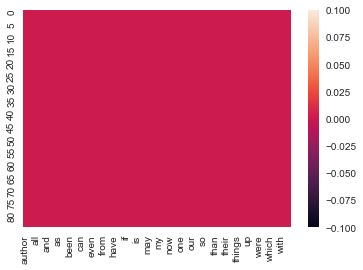

In [70]:
sns.heatmap(federalist_papers.isnull())

<AxesSubplot:>

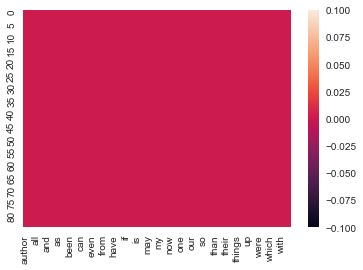

In [71]:
sns.heatmap(federalist_papers.isna())

In [16]:
paper_arr = federalist_papers.iloc[:,2:].values
paper_arr.shape

(85, 70)

In [18]:
paper_arr

array([[0.28 , 0.052, 0.009, ..., 0.087, 0.192, 0.   ],
       [0.177, 0.063, 0.013, ..., 0.063, 0.139, 0.   ],
       [0.339, 0.09 , 0.008, ..., 0.045, 0.068, 0.   ],
       ...,
       [0.177, 0.052, 0.047, ..., 0.099, 0.021, 0.   ],
       [0.243, 0.091, 0.008, ..., 0.061, 0.023, 0.   ],
       [0.347, 0.097, 0.007, ..., 0.083, 0.083, 0.   ]])

# K MEANS CLUSTERING

#### Elbow method for finding number of clusters (K value)

In [21]:
SSE_cluster = []
for i in range(2,11): # choosing 10 clusters
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(paper_arr) # Compute k-means clustering
    SSE_cluster.append(kmeans.inertia_)

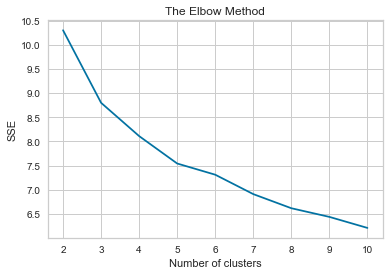

In [23]:
plt.plot(range(2,11),SSE_cluster) # plotting numbers of clusers vs SSE
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

#### From the above SSE vs Number of clusters line plot, we can conclude that 5 clustering can be possible

In [41]:
# Fitting K means to the dataset
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=0)
y_kmeans = kmeans.fit_predict(paper_arr) # Compute cluster centers and predict cluster index for each sample
y_kmeans # contains index of the cluster each sample belongs to

array([1, 1, 1, 1, 3, 1, 3, 4, 1, 3, 1, 3, 3, 3, 3, 3, 2, 4, 3, 3, 2, 3,
       3, 3, 2, 2, 2, 3, 2, 1, 3, 3, 3, 2, 3, 4, 2, 2, 2, 2, 2, 2, 2, 3,
       3, 2, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 2, 2, 3, 2, 3, 3, 4, 4, 4, 0,
       0, 0, 0, 0, 4, 1, 4, 3, 1, 4, 1, 4, 1, 1, 1, 1, 1, 4, 1])

#### VALIDATING THE CLUSTER MODEL WITH SILHOUETTE SCORE

In [43]:
score = silhouette_score(paper_arr, y_kmeans)
score # 0.12 is still a good score because score is not negative. 

0.11557311610199418

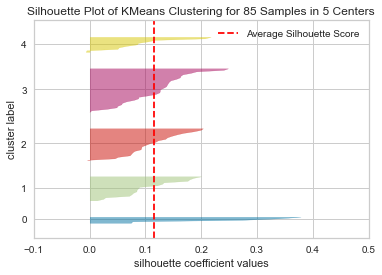

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 85 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [45]:
#Using Silhouette Plot
visualizer = SilhouetteVisualizer(kmeans,colors =  'yellowbrick')

#Fit the data to the visualizer
visualizer.fit(paper_arr)       

#Render the figure
visualizer.show()

In [52]:
# confusion matrix
confusion_matrix = pd.crosstab(federalist_papers['author'],y_kmeans,rownames=['Actual'],colnames=['Predicted'])
confusion_matrix

Predicted,0,1,2,3,4
Actual,,,,,
HM,0,0,0,0,3
Hamilton,0,1,22,26,2
Jay,5,0,0,0,0
Madison,0,9,0,1,5
dispt,0,7,0,3,1


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

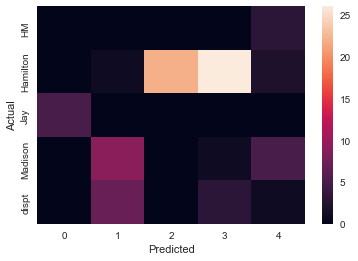

In [53]:
sns.heatmap(confusion_matrix)

# HIERARCHIAL CLUSTERING

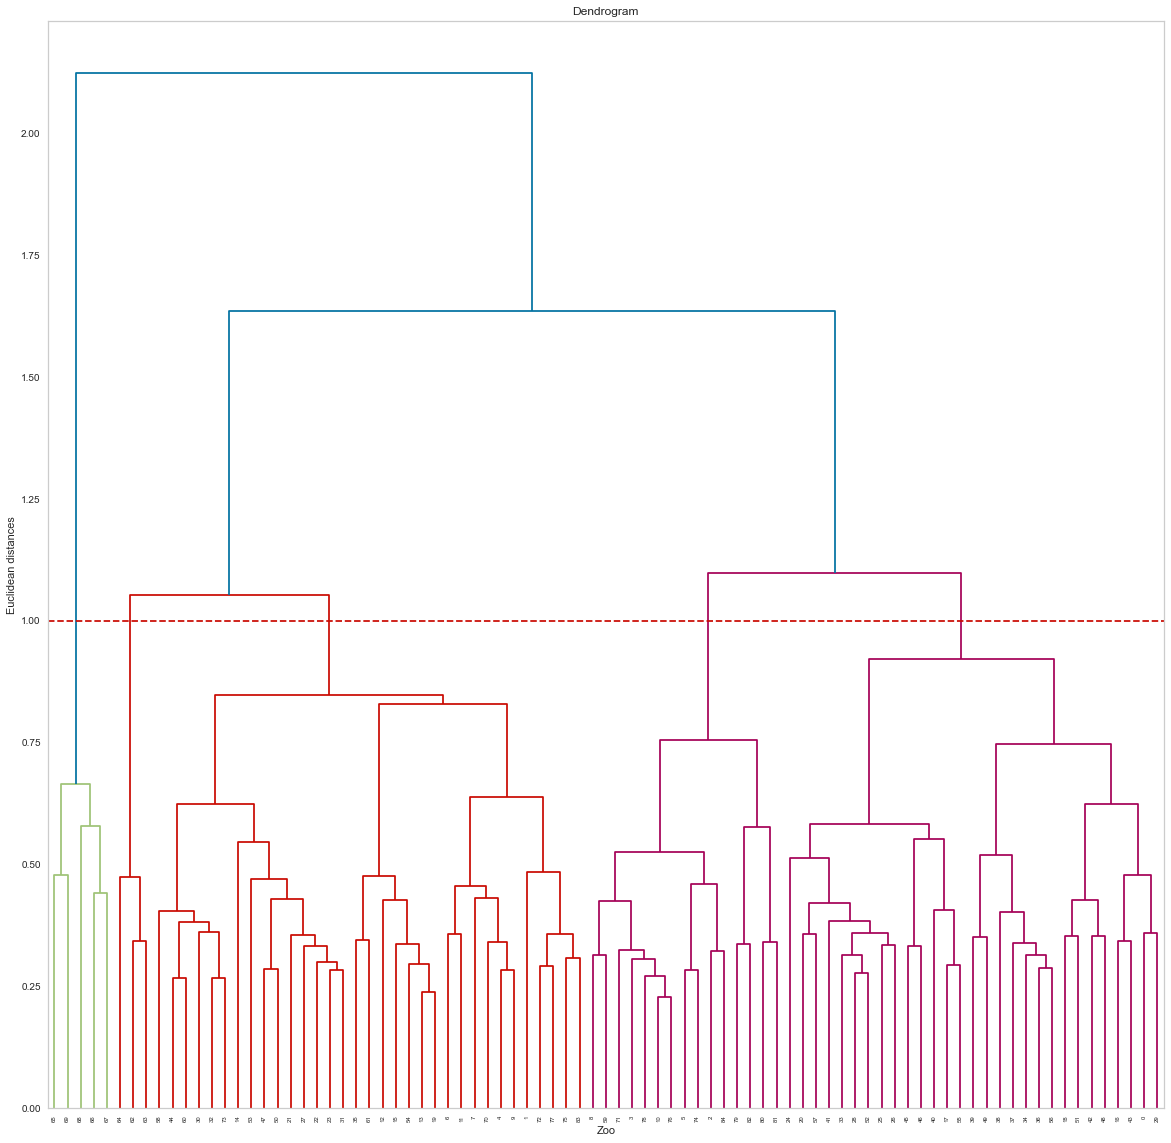

In [57]:
# dendogram to find number of clusters
plt.figure(figsize=(20, 20))  

dendrogram_comp = sch.dendrogram(sch.linkage(paper_arr, method  = "ward"), 
                            orientation='top')
plt.title('Dendrogram')
plt.xlabel('Zoo')
plt.ylabel('Euclidean distances')
plt.axhline(y=1.00, color='r', linestyle='--')
plt.grid(b=None)


#### From the above dendogram, we can conclude that 5 clustering can be possible

In [63]:
# Fitting hierarchical clustering to the Zoo dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')
predicted = hc.fit_predict(paper_arr)
predicted[:10]

array([0, 2, 1, 1, 2, 1, 2, 2, 1, 2], dtype=int64)

In [65]:
# confusion matrix
confustion_matrix = pd.crosstab(federalist_papers['author'],predicted,rownames=['Actual'],colnames=['Predicted'])
confustion_matrix

Predicted,0,1,2,3,4
Actual,,,,,
HM,0,0,0,0,3
Hamilton,28,1,22,0,0
Jay,0,0,0,5,0
Madison,0,9,6,0,0
dispt,1,5,5,0,0


<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

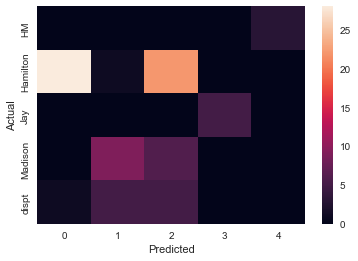

In [66]:
sns.heatmap(confustion_matrix)